In [612]:
import numpy as np
import matplotlib.pyplot as plt


In [613]:
# convert scientific notation to float
pretty_list_print = lambda x: float(np.format_float_positional(x, trim="-"))

def pretty_matrix_print(L):
    return [[pretty_list_print(k) for k in i] for i in np.array(L)]

# print(pretty_print(1.32456e-12))
# print(pretty_print(1.32456e-24))
# print(pretty_print(1.32456e12))
# print(pretty_print(1.32456e24))

In [614]:
c = 3e8

In [725]:
def create(v):
    g = 1/np.sqrt((1-(v/c)**2))
    L = np.matrix([[g, -g*v/c**2,0,0],
                   [-g*v,g,0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return L

In [726]:
v = 0.5
create(v)

matrix([[ 1.00000000e+00, -5.55555556e-18,  0.00000000e+00,
          0.00000000e+00],
        [-5.00000000e-01,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])

In [616]:
def l1(t,x):
    # un evenement se produit en x et au temps t dans le referentiel fixe
    # sera vu en x' et au temps t' dans le refentiel mobile
    p = np.matrix([t,x,0,0]).T
    #(L*p).round(decimals=5)
    result = pretty_matrix_print(L*p)
    #print("t' =", result[0][0], "\nx' = ",result[1][0])
    return result[0][0],result[1][0]


In [618]:
v = 0.1*c
L = create(v)
pretty_matrix_print(L)


[[1.005037815259212, -3.3501260508640407e-10, 0.0, 0.0],
 [-30151134.457776364, 1.005037815259212, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0]]

In [619]:
v, v/c

(30000000.0, 0.1)

In [629]:
def draw(t1,x1,t2,x2):
    #print(v/c)
    fig, (ax1, ax2) = plt.subplots(2)
    #plt.title(v/c)
    ax1.plot(x1,t1, 'ro')
    ax1.grid()
    ax2.plot(x2,t2,'rx',label="v/c="+str(k/10))
    ax2.grid()
    ax2.legend()


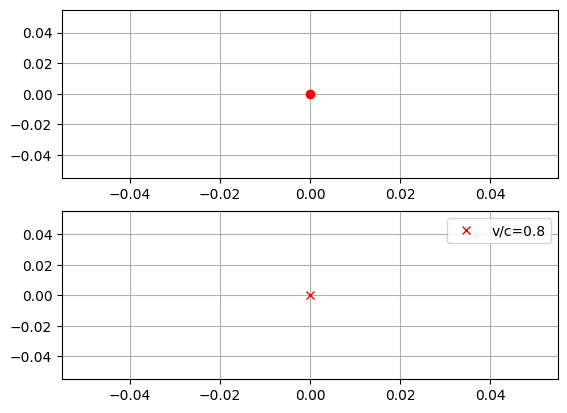

In [630]:
# au temps t = 0 et en x, on a x' = 0 et t' = 0
x = 0
t = 0

t2, x2= l1(t,x)
draw(t,x,t2,x2)

0.1 1.005037815259212 -30151134.457776364


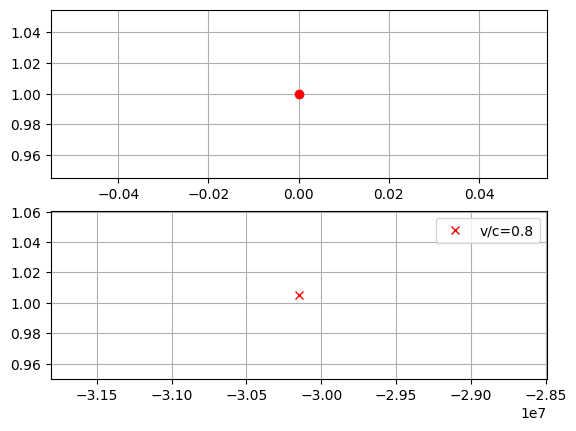

In [622]:
x = 0
t = 1
t2, x2 = l1(t,x)
print(v/c,t2,x2)
draw(t,x,t2,x2)


0.1 -1.6750630254320203e-08 50.251890762960606


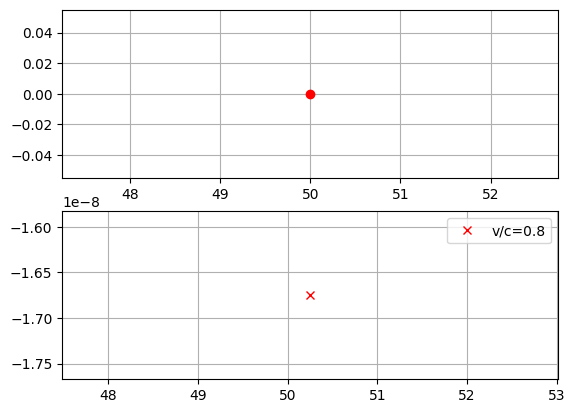

In [623]:
x = 50
t = 0
t2, x2 = l1(t,x)
print(v/c,t2,x2)
draw(t,x,t2,x2)

0.1 1.0050378149241994 -30151133.45273855


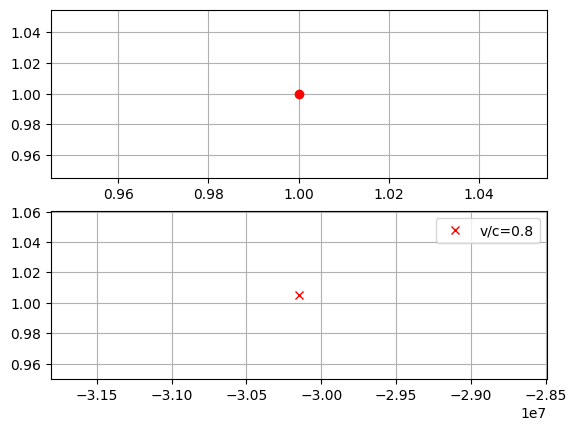

In [624]:
x = 1
t = 1
t2, x2 = l1(t,x)
print(v/c,t2,x2)
draw(t,x,t2,x2)

In [617]:
def l2(v,t,x):
    L = create(v)
    # un evenement se produit en x et au temps t dans le referentiel fixe
    # sera vu en x' et au temps t' dans le refentiel mobile
    p = np.matrix([t,x,0,0]).T
    #(L*p).round(decimals=5)
    result = pretty_matrix_print(L*p)
    #print("t' =", result[0][0], "\nx' = ",result[1][0])
    return result[0][0],result[1][0]

In [636]:
L

matrix([[ 1.00503782e+00, -3.35012605e-10,  0.00000000e+00,
          0.00000000e+00],
        [-3.01511345e+07,  1.00503782e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])

In [667]:
def draw1(t,x):
    
    #plt.title(v/c)
    ax1.plot(x,t, 'ro',label='fixe')
    ax1.grid()
    ax1.legend()

def draw2(k,t1,x1,t2,x2):
    #print(v/c)
    
    ax2.plot(x2,t2,'r+',label="mobile v/c="+str(v/c))
    ax2.grid()
    ax2.legend()

In [722]:
t,x = 1,5
v = 0.9999*c
L = create(v)
t2, x2 = l2(v, t, x)
t2, x2


(70.71244477349161, -21211612058.633568)

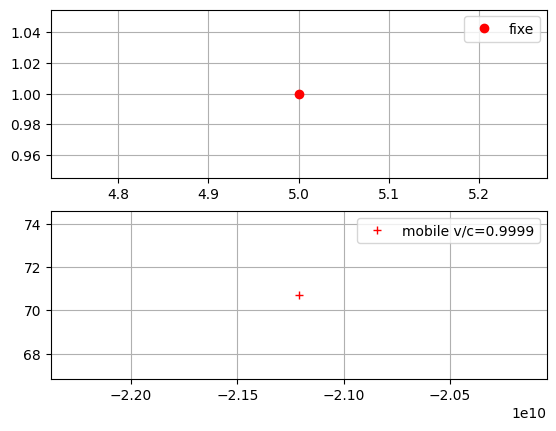

In [723]:
fig, (ax1, ax2) = plt.subplots(2)
draw1(t,x)
draw2(v,t,x,t2,x2)


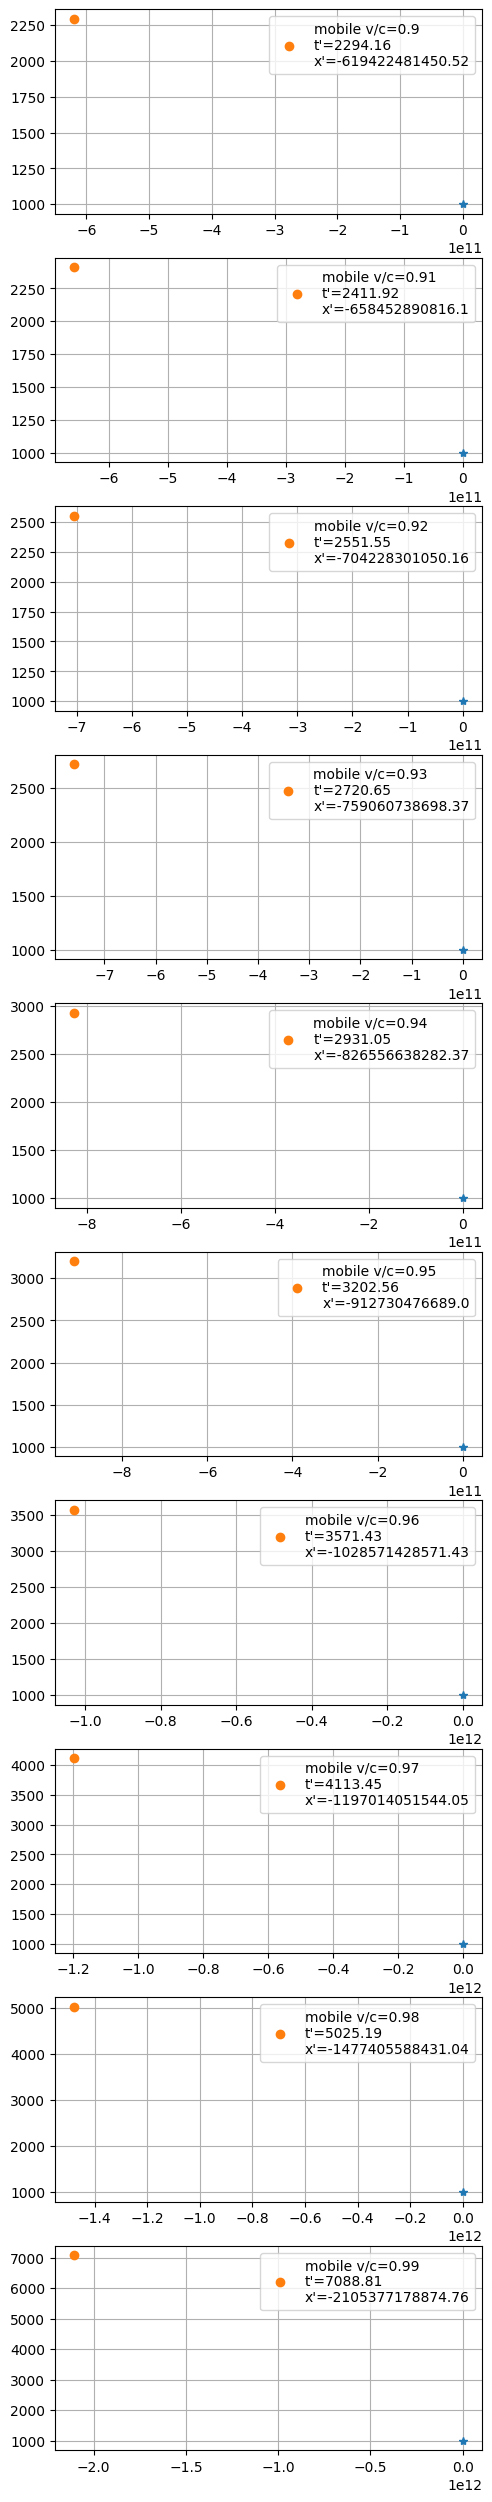

In [719]:
t, x = 1000, 0
n = 10
fig, ax = plt.subplots(n)
fig.set_figheight(25)
fig.set_figwidth(5)
fig.tight_layout()

for k in range(0,n):
    v = (0.9+k/100)*c
    L = create(v)
    t2, x2 = l2(v, t, x)
    ax[k].plot(x,t,'*') 
    ax[k].plot(x2,t2,'o', label="mobile v/c="+str(v/c)+"\nt'="+str(round(t2,2))+"\nx'="+str(round(x2,2)))
    ax[k].grid()
    ax[k].legend()
